# Loading the Data

### Directory Sructure
For each emotion category (5), you will find the following directory structure:

`./proc_emotion`

`./proc_emotion/crop`

`./proc_emotion/crop/train`

`./proc_emotion/crop/test`

`./proc_emotion/ori`

`./proc_emotion/ori/train`

`./proc_emotion/ori/test`

`./proc_emotion/feats`


Hopefully this is self-explanatory: the `crop` folders contain the cropped faces in the `train` and `test` folders (80/20 split), same thing with the `ori` folders (original, unprocessed images.

*Russel* you may want to take the whole unprocessed images as inputs to your ConvNets.

In terms of filenames, it is also quite straightforward. Pictures are labelled `xxxx.jpeg`, in ascending order from 0.
For the following categories

`['proc_neutral', 'proc_happy', 'proc_sad', 'proc_fear', 'proc_anger']`

Any file name with `xxxx` <=

`[524, 1032, 440, 527, 556]`

will be in the training set, otherwise will be in the testing set.

The `feats` folders contain archives of feature vectors from VGG and EmotiW models for use by Lewis and Charles. Will need to split the arrays like this:

`train=np.load('emo.npy')[:,:524]`

`test=np.load('emo.npy')[:,524:]`

etc.


In order to load the actual images, use something like this:

In [5]:
import os
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

In [6]:
dir='./proc_sad/crop/train/'
list_imgs=[]
for file in os.listdir(dir):
    img=mpimg.imread(dir+file)
    list_imgs.append(img)

Images are loaded as numpy arrays and can be visualised like this:

In [7]:
first_img=list_imgs[0]
first_img.shape

(120, 88, 3)

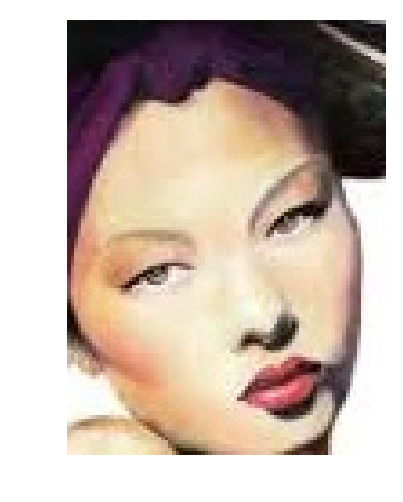

In [17]:
plt.imshow(first_img)
plt.axis('off');

Max Intensities

In [15]:
np.max(first_img[:,:,0]), np.max(first_img[:,:,1]), np.max(first_img[:,:,2])

(255, 255, 255)

You may want to do some further pre-processing of intensities, image shape, etc. This is up to you.

Finally here is a small script to load all the images in the training sets:

In [23]:
folders=['proc_neutral', 'proc_happy', 'proc_sad', 'proc_fear', 'proc_anger']
folders=['./'+f+'/crop/train/' for f in folders]
folders

['./proc_neutral/crop/train/',
 './proc_happy/crop/train/',
 './proc_sad/crop/train/',
 './proc_fear/crop/train/',
 './proc_anger/crop/train/']

In [32]:
# loading this in lists as input arrays have different shapes
data=[]
for folder in folders:
    print(folder)
    list_imgs=[]
    for file in os.listdir(folder):
        img=mpimg.imread(folder+file)
        list_imgs.append(img)
    data.append(list_imgs)

./proc_neutral/crop/train/
./proc_happy/crop/train/
./proc_sad/crop/train/
./proc_fear/crop/train/
./proc_anger/crop/train/


In [33]:
len(data) # 5 cats

5

In [34]:
len(data[0]) # 525 neutral faces in training set

525

In [42]:
data[0][0] # first image

array([[[86, 74, 84],
        [88, 76, 86],
        [77, 67, 76],
        ..., 
        [59, 61, 76],
        [54, 55, 73],
        [51, 52, 70]],

       [[80, 68, 78],
        [75, 63, 73],
        [71, 61, 70],
        ..., 
        [60, 62, 77],
        [54, 55, 73],
        [55, 56, 74]],

       [[83, 71, 81],
        [68, 56, 66],
        [71, 61, 72],
        ..., 
        [57, 56, 72],
        [51, 52, 70],
        [55, 56, 74]],

       ..., 
       [[82, 70, 70],
        [94, 82, 82],
        [83, 73, 74],
        ..., 
        [74, 63, 69],
        [33, 23, 31],
        [39, 29, 38]],

       [[70, 58, 58],
        [78, 66, 66],
        [71, 61, 62],
        ..., 
        [96, 83, 90],
        [53, 42, 50],
        [46, 36, 45]],

       [[77, 65, 65],
        [86, 74, 74],
        [77, 67, 68],
        ..., 
        [86, 73, 80],
        [63, 52, 60],
        [37, 27, 35]]], dtype=uint8)

### Resizing Images

In order to standardise the input dimensions, you may want to resize the images so that dimensions match:

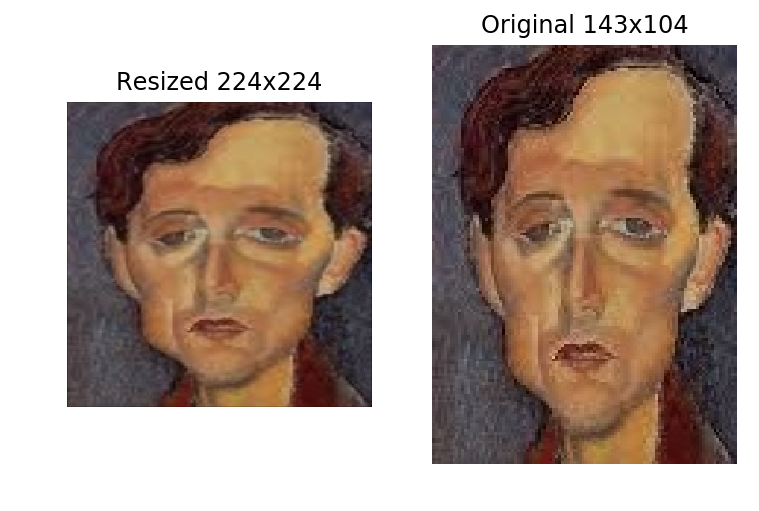

In [43]:
from skimage import transform
img = transform.resize(data[0][0], (224, 224, 3))
plt.subplot(121)
plt.imshow(img)
plt.title('Resized 224x224')
plt.axis('off')
plt.subplot(122)
plt.imshow(data[0][0])
plt.title('Original 143x104')
plt.axis('off');

Emotional content should not be lost by stretching..